In [1]:
%reload_ext autoreload
%autoreload 2

## Influence of time on the ratings

In this part we will analyse the time bias in the ratings, how the time influence the final ratings of beer. We see the evolution through the years but also the difference at some special period, specifically the Christmas and new year period and the Oktoberfest period.

In [2]:
from src.data.time_bias import *

# Load the data and do some preprocessing, cleaning and add time columns
time_df_rateBeer, time_df_beerAdvocate = load_time_bias_data('data')

First we look at different style of beer and how they evolve through the years. We start by looking only on the rateBeer dataset, to reduce redundant plot, as both are he same for these plot.

In [3]:
# Analysis using time and rating per beer style
time_df_rateBeer_style = time_df_rateBeer.copy()
# Take randomly (following a seed) 10 type of style
time_df_rateBeer_style = time_df_rateBeer_style[time_df_rateBeer_style['style'].isin(time_df_rateBeer_style['style'].sample(10, random_state=1))]
time_df_rateBeer_style = time_df_rateBeer_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

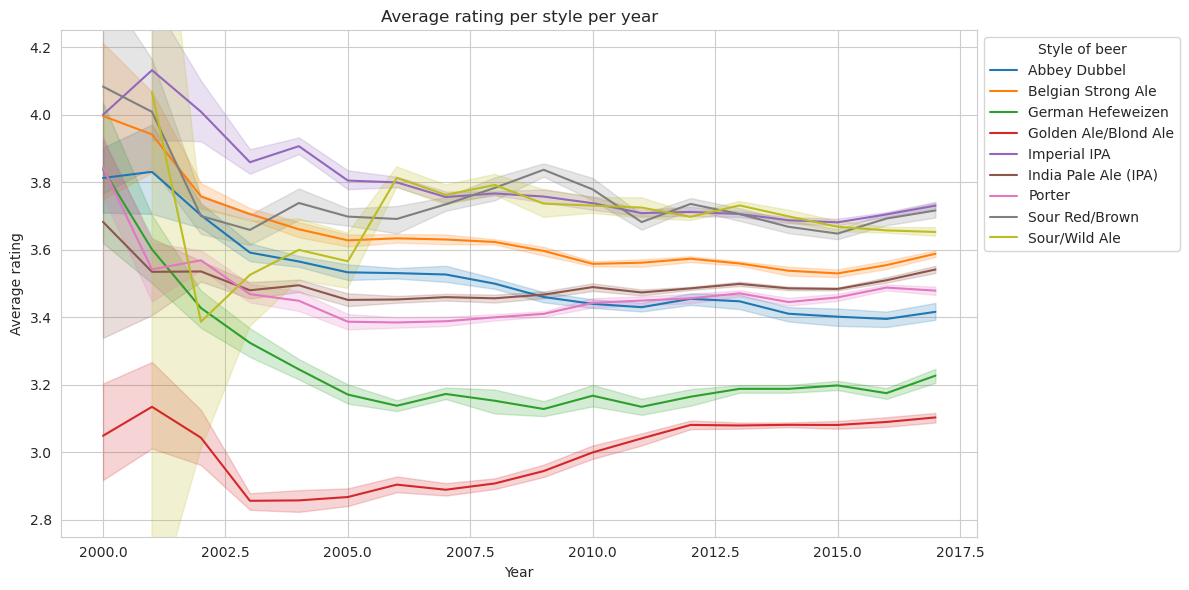

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_rateBeer_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per style per year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(2.75, 4.25)
plt.tight_layout()

They all start with a high variance in the ratings, but as the years go by, the ratings tend to converge to a certain value. The high rated seams to go down, and the low rated seams to go up. globally they are quite stable. Let's test some more style to confirm.

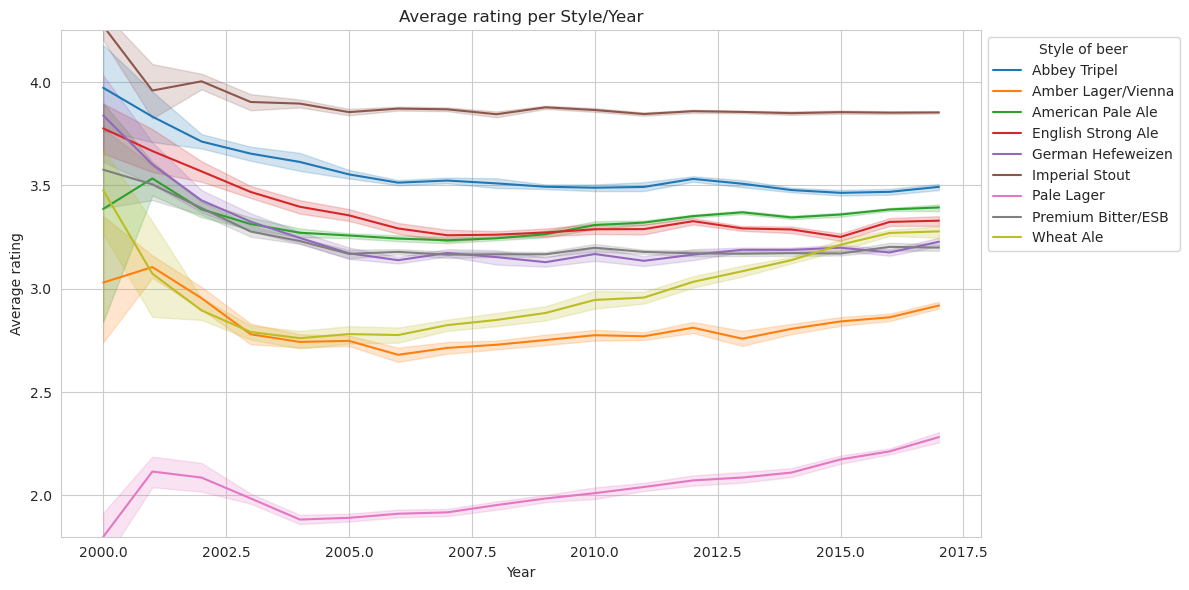

In [5]:
# Take randomly (following a seed) 10 type of style
time_df_rateBeer_style = time_df_rateBeer.copy()
time_df_rateBeer_style = time_df_rateBeer_style[time_df_rateBeer_style['style'].isin(time_df_rateBeer_style['style'].sample(10, random_state=2))]
time_df_rateBeer_style = time_df_rateBeer_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_rateBeer_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per Style/Year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(1.8, 4.25)
plt.tight_layout()

In [6]:
# compute the mean rating for the years 2016 and 2017
rateBeer_end = time_df_rateBeer[time_df_rateBeer['year'].isin([2016, 2017])]
# Calculate the global mean rating for those years
global_mean_end = rateBeer_end['rating'].mean()
print(f"Global mean rating for the last years: {global_mean_end}")

Global mean rating for the last years: 3.412139683797763


We see that the second sample of style follow the same rule as the first one. The ratings tend to converge to a certain value. The high rated seams to go down, and the low rated seams to go up. We will try to explain this with more researches. We note that the global rating for all beer for the last two years is 3.41.

Here we will see what and how much the year the month and the day affect the rating for both dataset.

In [7]:
# Do a logistic regression analysis to identify factors affecting ratings
regression_analysis(time_df_rateBeer)

Optimization terminated successfully.
         Current function value: 0.668482
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              6117679
Model:                          Logit   Df Residuals:                  6117675
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                0.008102
Time:                        22:15:24   Log-Likelihood:            -4.0896e+06
converged:                       True   LL-Null:                   -4.1230e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.0059      0.431   -255.329      0.000    -110.850    -109.162
year           0.0549      0.

In [8]:
# Do a logistic regression analysis to identify factors affecting ratings
regression_analysis(time_df_beerAdvocate)

Optimization terminated successfully.
         Current function value: 0.677492
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              2199798
Model:                          Logit   Df Residuals:                  2199794
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                0.004022
Time:                        22:15:27   Log-Likelihood:            -1.4903e+06
converged:                       True   LL-Null:                   -1.4964e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.7804      0.801   -107.147      0.000     -87.350     -84.211
year           0.0428      0.

We can see for both dataset that the year has a significant impact on the rating, the month and the day have a less significant impact. With little more impact on the RateBeer dataset.

Now we will compare the average rating per year for all beer and see there evolution as we know the year affect much. We add an error bar using the standard deviation. We test this for both dataset to see the difference. We also look at how many rating have been given for each year.

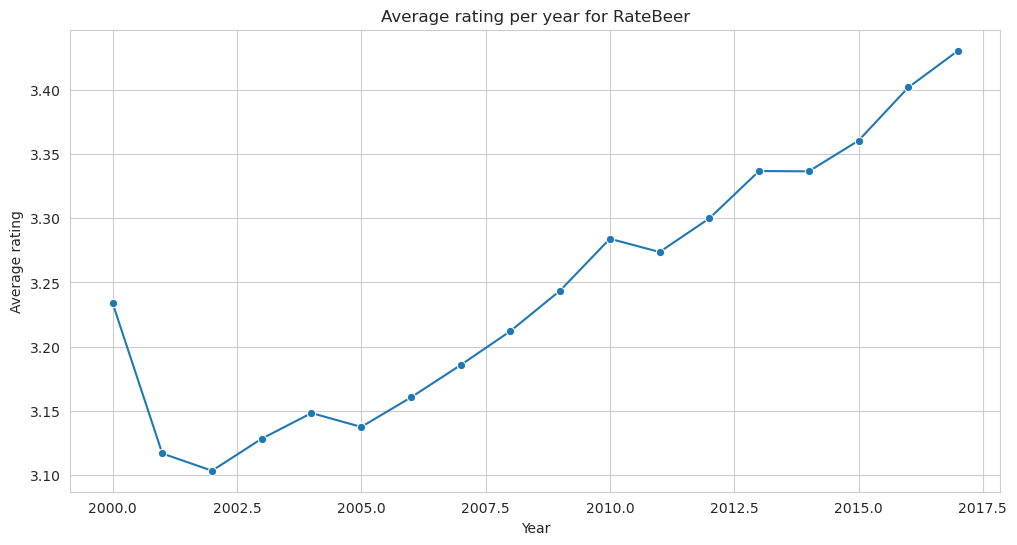

In [9]:
# Compare the average rating per year for all beer for the RateBeer dataset
mean = time_df_rateBeer.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per year for RateBeer')
plt.show()

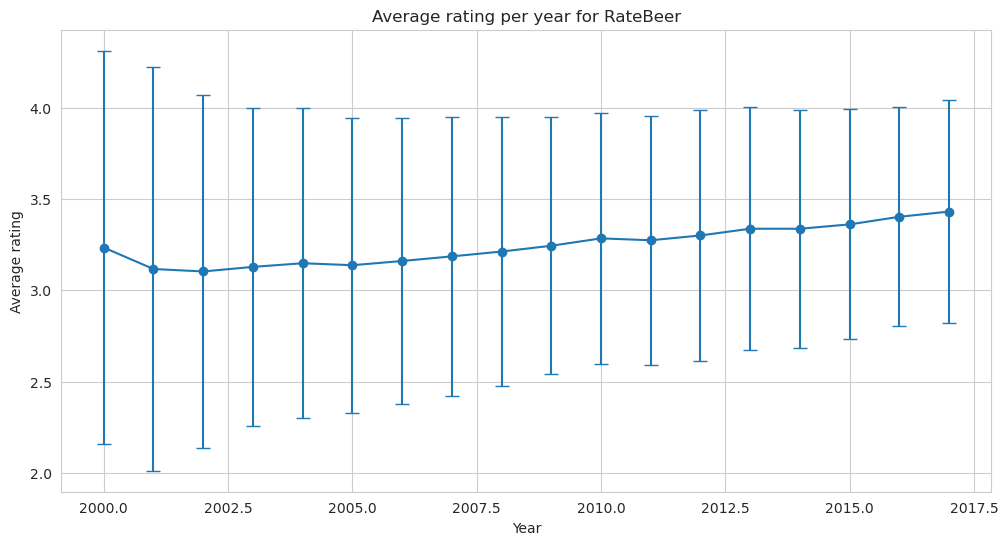

In [10]:
# Compare the average rating per year for all beer with std for the RateBeer dataset
mean = time_df_rateBeer.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_rateBeer.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per year for RateBeer')
plt.show()

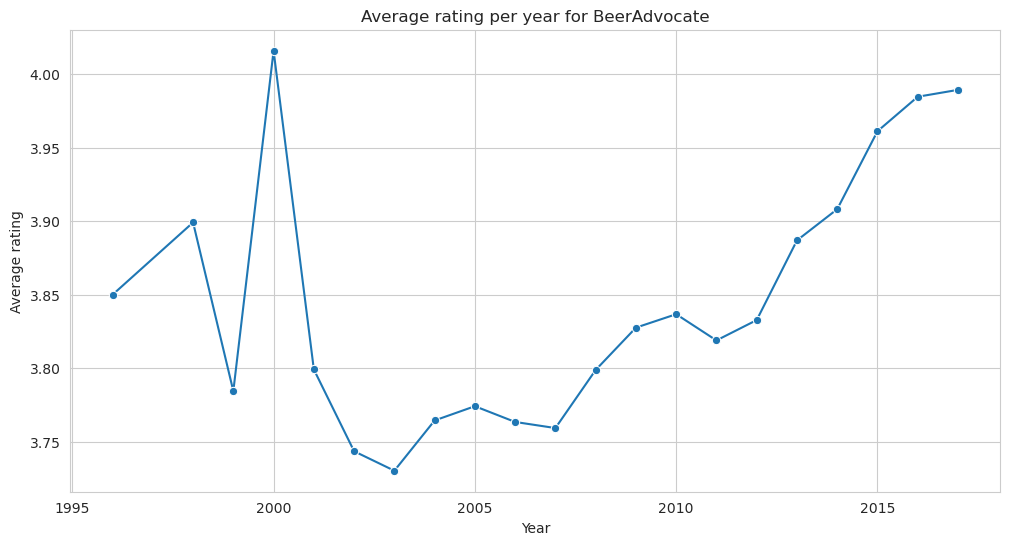

In [11]:
# Compare the average rating per year for all beer for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per year for BeerAdvocate')
plt.show()

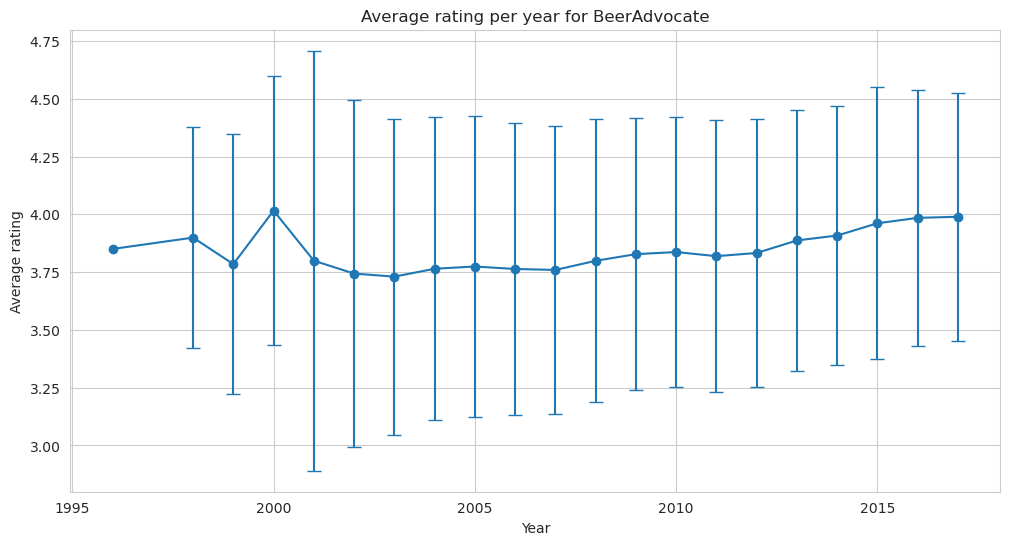

In [12]:
# Compare the average rating per year for all beer with std for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_beerAdvocate.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per year for BeerAdvocate')
plt.show()

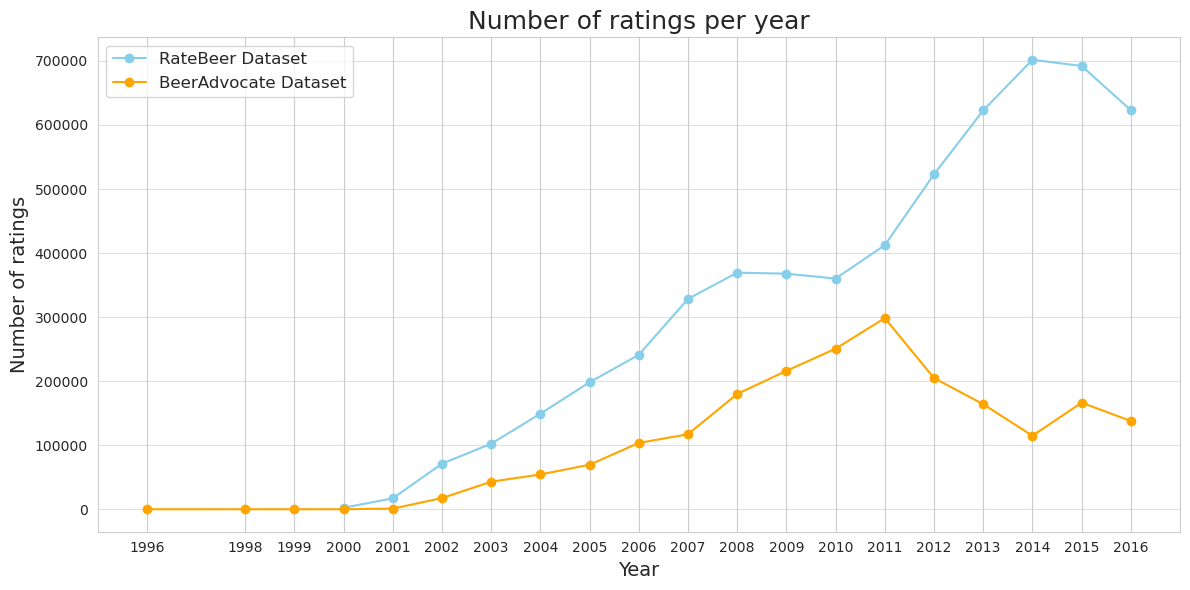

In [13]:
# Group by year and count the number of ratings for each dataset
ratings_rateBeer = time_df_rateBeer.groupby('year')['rating'].count().reset_index()
ratings_beerAdvocate = time_df_beerAdvocate.groupby('year')['rating'].count().reset_index()
# Discard year 2017 as the year is not complete
ratings_rateBeer = ratings_rateBeer[ratings_rateBeer['year'] != 2017].reset_index()
ratings_beerAdvocate = ratings_beerAdvocate[ratings_beerAdvocate['year'] != 2017].reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Reviews dataset
plt.plot(ratings_rateBeer['year'], ratings_rateBeer['rating'], label='RateBeer Dataset', marker='o', color='skyblue')
# BeerAdvocate dataset
plt.plot(ratings_beerAdvocate['year'], ratings_beerAdvocate['rating'], label='BeerAdvocate Dataset', marker='o', color='orange')

plt.title('Number of ratings per year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of ratings', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.6)
plt.xticks(ratings_beerAdvocate['year'])
plt.tight_layout()

# Show plot
plt.show()

The first year are not determinant as the number of review are very low, we will only focus on the data from 2001 for RateBeer and 2002 for BeerAdvocate. In these 5 plot we can see the that for both datasets the average ratings goes up through the year, from 3.10 to 3.43 for RateBeer and 3.74 to 3.98 for beerAdvocate. The standard deviation goes down for both. We also see a big increase in the number of review through the year, with a downfall for BeerAdvocate from 2011. This mean the rating for the beer are growing more similar threw the time, and a little better. This can be explained by different bias that we look into in this research.

To deepen ours analysis on the time bias, we will compare the ratings during the Christmas and new year period and the Oktoberfest period with the rest of the year to see if there is a difference. These two moment are holidays were people goes out much and drink lots of beer.

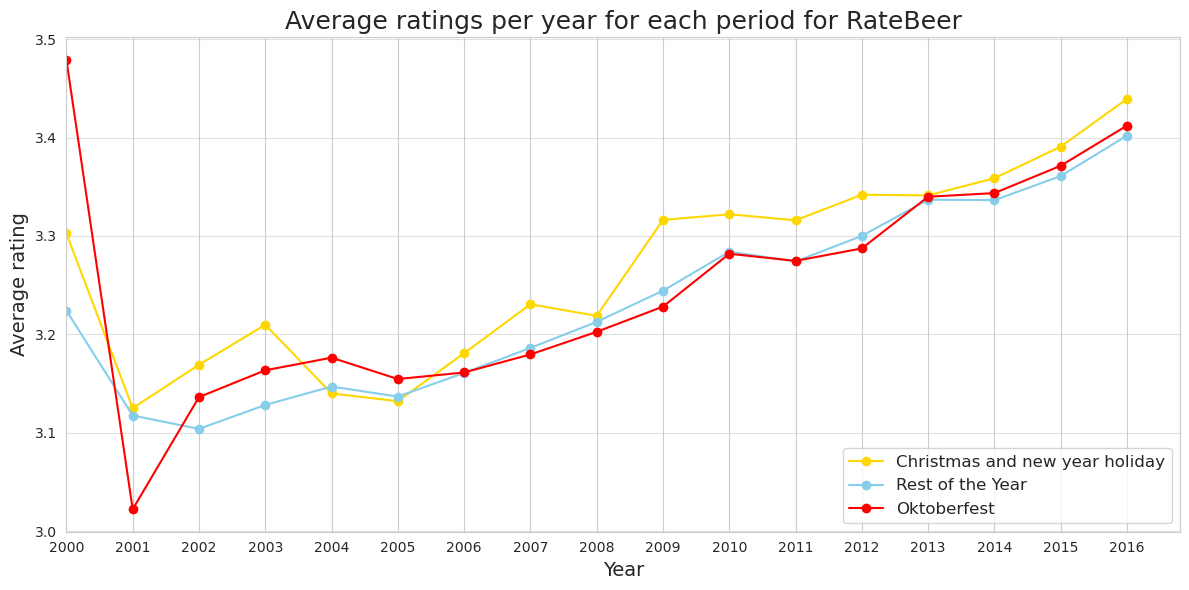

In [14]:
time_period_rating(time_df_rateBeer)
plt.title('Average ratings per year for each period for RateBeer', fontsize=18)
plt.tight_layout()

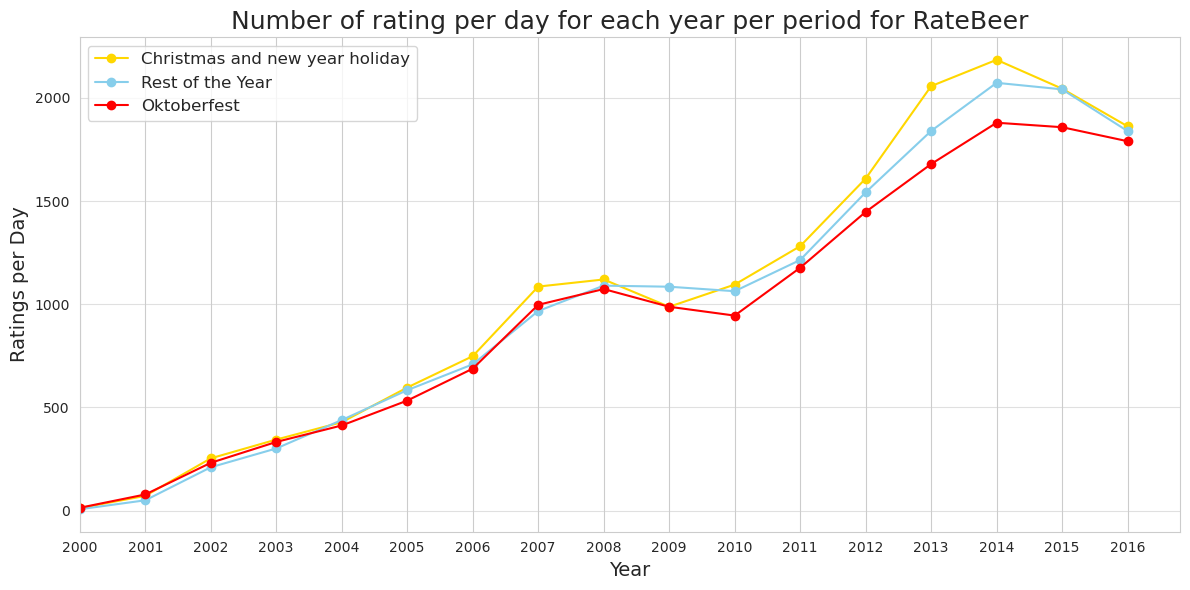

In [15]:
time_period_per_day(time_df_rateBeer)
plt.title('Number of rating per day for each year per period for RateBeer', fontsize=18)
plt.tight_layout()

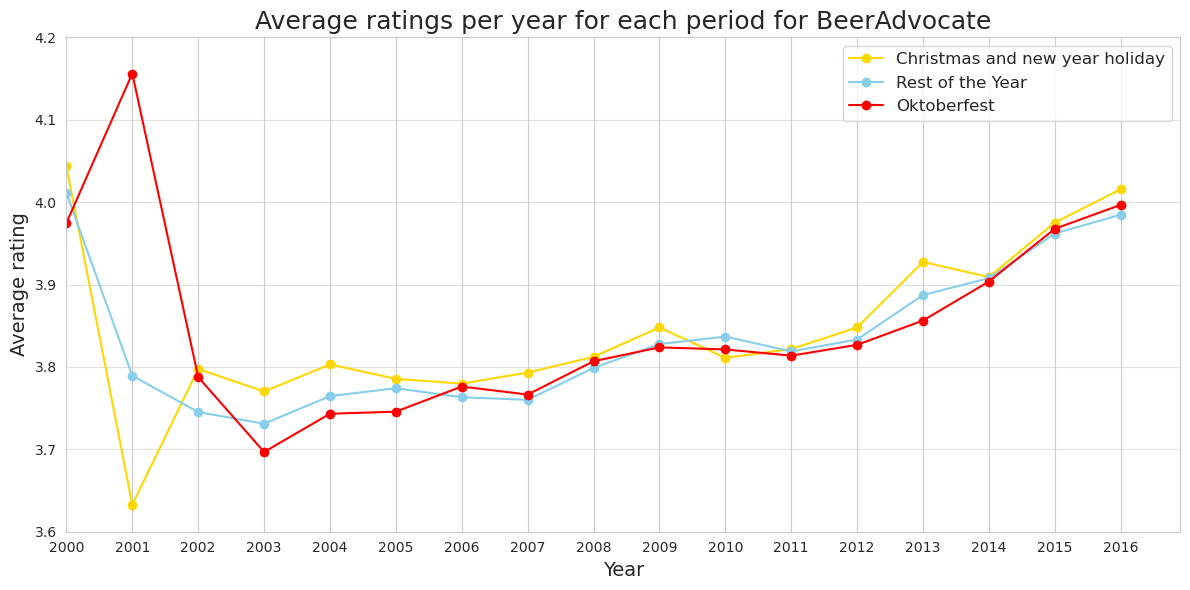

In [16]:
time_period_rating(time_df_beerAdvocate)
plt.title('Average ratings per year for each period for BeerAdvocate', fontsize=18)
plt.ylim(3.6, 4.2)
plt.tight_layout()

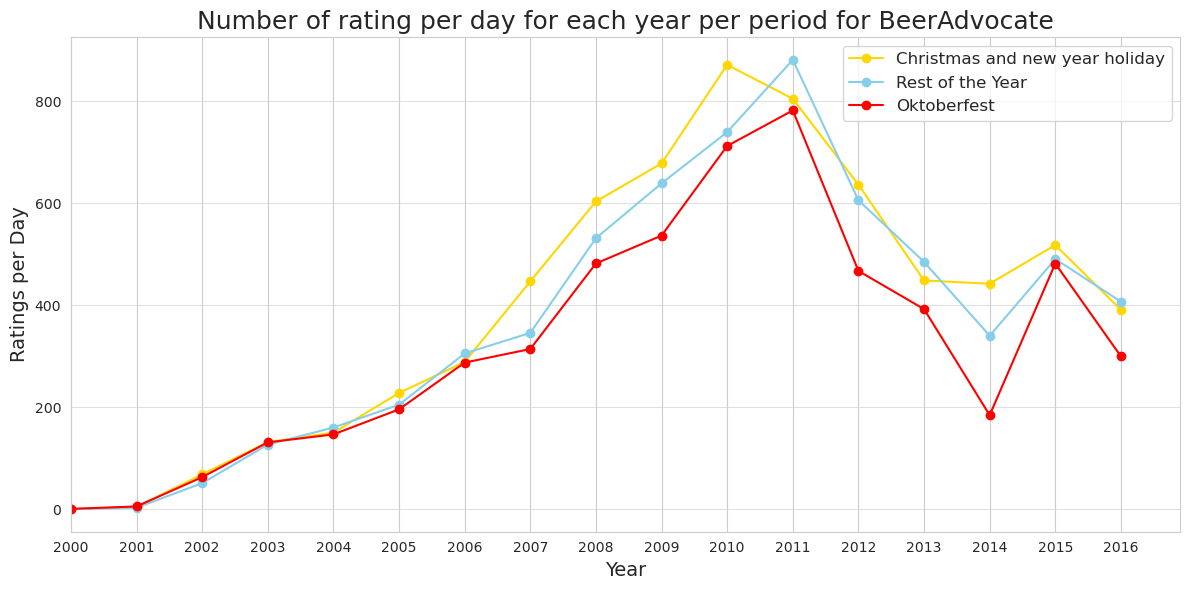

In [17]:
time_period_per_day(time_df_beerAdvocate)
plt.title('Number of rating per day for each year per period for BeerAdvocate', fontsize=18)
plt.tight_layout()

We see that on both dataset, the holidays rating are a little higher and there are more rating done, this could be because there a more people drinking and having time to review, and in a better environment this make them give slightly better result. As oppose for the Oktober fest period were it seam to have no influence, the fest are not famous enough in the whole world and only in some country to make a sufficient impact. There seam even that there are less review at that time, it could be a busy period for the people not concerned by the holiday.

## Impact of the Anchoring Effect

In [18]:
from src.data.anchoring_bias import * 

RateBeer_path = 'data/RateBeer/ratings.csv'
BeerAdvocate_path = 'data/BeerAdvocate/ratings.csv'

The first thing we want to do is to observe the data, as it is very noisy we smooth it using a moving average.

On this two cherry picked plots, we observe a tendancy:
- When the firsts rating are high the following tend decrease
- When the firsts rating are low the following tend increase

They always seem to go closer to the average rating of 3 with time.

In [19]:
min_count = 3000

# create dataset with ratings and date
RateBeerRatingDate_df = loadRatingDate(RateBeer_path, min_count)
BeerAdvocateRatingDate_df = loadRatingDate(BeerAdvocate_path, min_count)

# merge the ordered rating for each beer in a list
RateBeerRatingDateList_df = RateBeerRatingDate_df.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  rating=('rating', list))
BeerAdvocateRatingDateList_df = BeerAdvocateRatingDate_df.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  rating=('rating', list))

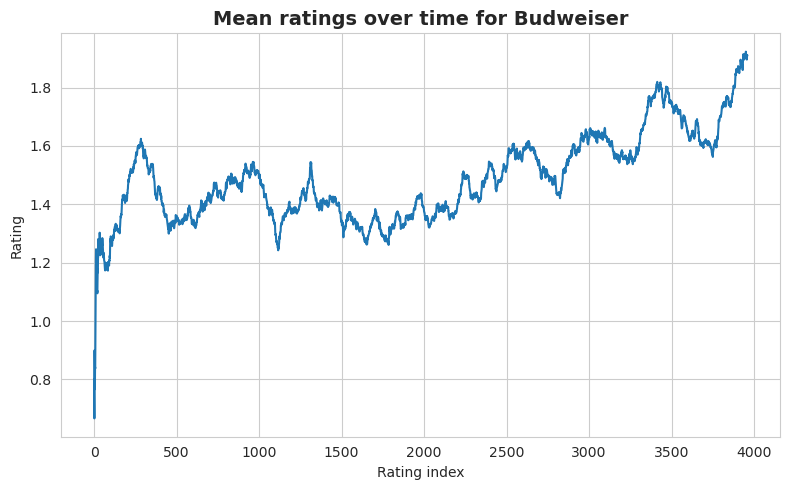

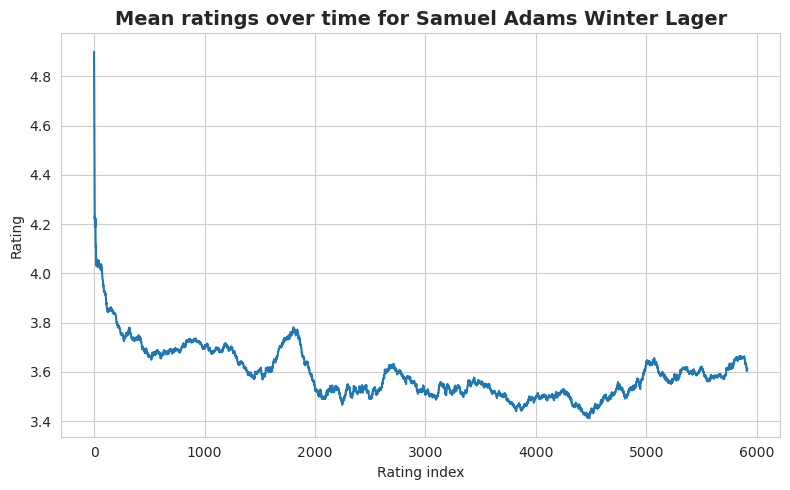

In [20]:
plot_moving_average_unique(RateBeerRatingDateList_df, 12, 200)
plot_moving_average_unique(BeerAdvocateRatingDateList_df, 14, 200)

To see if the previously observed tendancy really exist, we want to plot the average distance between every rating and the average rating of 3, for every popular beer on the dataset.
We choose only the popular beers because we need many rating to observe the plot over the rating index.

On these two lot we can clearly observe that the first rating tend to be more extreme and they get closer to 3 with time.

In [21]:
RateBeerRatingDate_df['abs_diff'] = abs(RateBeerRatingDate_df['rating'] - 3)
BeerAdvocateRatingDate_df['abs_diff'] = abs(BeerAdvocateRatingDate_df['rating'] - 3)

# merge the ordered rating for each beer in a list
RateBeerAbsDiffList_df = RateBeerRatingDate_df.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  abs_diff=('abs_diff', list))
BeerAdvocateAbsDiffList_df = BeerAdvocateRatingDate_df.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  abs_diff=('abs_diff', list))

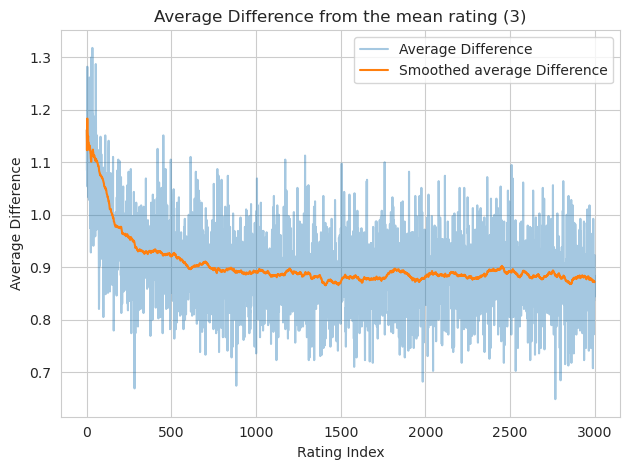

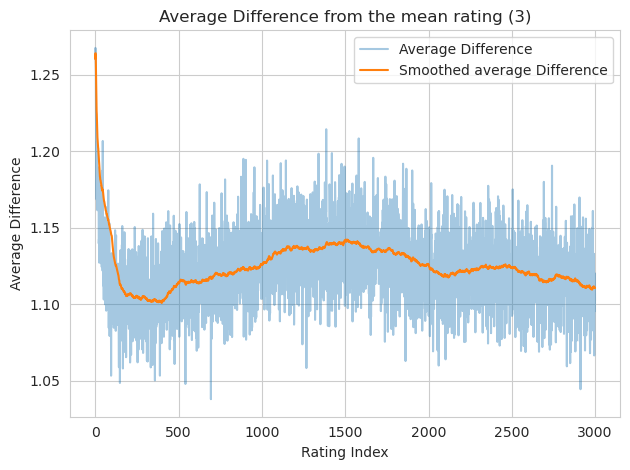

In [22]:
plot_smoothed_rating_diff(RateBeerAbsDiffList_df, min_count, 100)
plot_smoothed_rating_diff(BeerAdvocateAbsDiffList_df, min_count, 100)

In [23]:
# As we need the bro score we only use the BeerAdvocat ratings
first_vs_other_rating = load_data_first_rating(data_path=BeerAdvocate_path)

We plot the histogram of the firsts rating on every beer, and the overall rating.
We observe that the first rating are generally higher than the overall ratings.

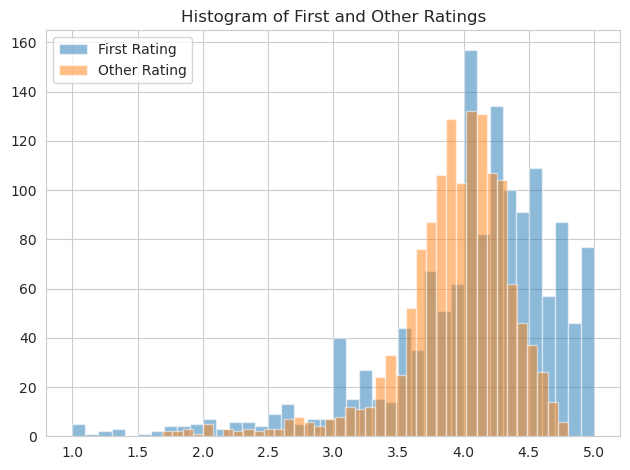

In [24]:
# plot a histogram of the first rating vs the average rating distributions
plt.hist(first_vs_other_rating['first_rating'], bins=40, alpha=0.5, label='First Rating')
plt.hist(first_vs_other_rating['other_rating'], bins=40, alpha=0.5, label='Other Rating')

plt.legend()
plt.title('Histogram of First and Other Ratings')
plt.tight_layout()
plt.show()

We want to see the correlation between the first rating goven to a beer and the overall rate of the same beer.
The correlation are significative but as it concerns the same beer this doesn't prove any anchoring effect.

In [25]:
from scipy.stats import pearsonr, spearmanr

# perform both perarsonr and spearmanr test on these distributions
p_corr, p_p_value = pearsonr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating'])
s_corr, s_p_value = spearmanr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating'])
print(f'The correlation according to perarsonr test is {p_corr} with a p-value of {p_p_value}.')
print(f'The correlation according to spearmanr test is {s_corr} with a p-value of {s_p_value}.')

The correlation according to perarsonr test is 0.6830005985679989 with a p-value of 1.6624784090791838e-193.
The correlation according to spearmanr test is 0.5941634172208455 with a p-value of 9.632156923063058e-135.


/tmp/ipykernel_31792/3848584648.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


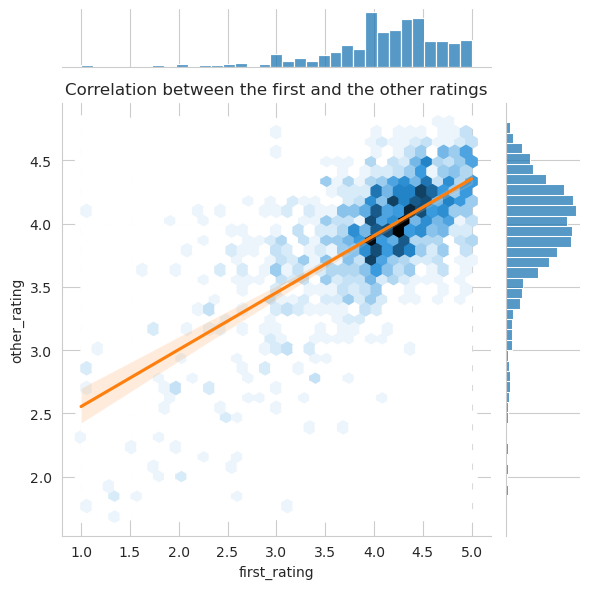

In [26]:
# join plot of the correlation between first_rating and other_rating

sns.jointplot(x='first_rating', y='other_rating', data=first_vs_other_rating, kind='hex')
sns.regplot(x='first_rating', y='other_rating', data=first_vs_other_rating, scatter=False, color='#FF7F0E')
plt.title('Correlation between the first and the other ratings')

plt.tight_layout()
plt.show()

We want to compare the overall rating of a beer and the bro score.
We split our data frame in two groups : the group that had high and low first rating.
The idea is that if a beer has a high first rating, the anchoring effect will increase the overall rating, and it should be greater than the bros score (that we considered as accurate and unbiased), and on the other hand if the first rating are low, the overall rating should be below the bro score.

In [27]:
# load bros_score df
bro_score_per_beer = loadBrosScoreDf()

In [28]:
# separate in low vs high first rating groups
high_ratings_with_bros_score, low_ratings_with_bros_score = prepareHighVsLow(first_vs_other_rating, bro_score_per_beer, 4, 2)

/home/yann/Desktop/ADA/ada-2024-project-insightmakers24/src/data/anchoring_bias.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_ratings_with_bros_score['rating_diff'] = low_ratings_with_bros_score['other_rating'] - \
/home/yann/Desktop/ADA/ada-2024-project-insightmakers24/src/data/anchoring_bias.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_ratings_with_bros_score['rating_diff'] = high_ratings_with_bros_score['other_rating'] - \


In [29]:
# print the mean of both group difference with bro_score
high_groupe_global_diff = high_ratings_with_bros_score['rating_diff'].mean()
low_groupe_global_diff = low_ratings_with_bros_score['rating_diff'].mean()

print(f'We can see that the difference between the website rating and the bro score for the group of high first rating is {high_groupe_global_diff}.')
print(f'And for the group of low first rating is {low_groupe_global_diff}.')

We can see that the difference between the website rating and the bro score for the group of high first rating is 0.03636341364260558.
And for the group of low first rating is -0.16977814424927007.


In [30]:
from scipy.stats import ttest_ind

# perform ttest on both diff lists
t_stat, p_value = ttest_ind(high_ratings_with_bros_score['rating_diff'], low_ratings_with_bros_score['rating_diff'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the two groups is significant.")
else:
    print("The is no significant difference between the two groupes.")


T-statistic: 4.020141537148968
P-value: 6.682349344487149e-05
The difference between the two groups is significant.


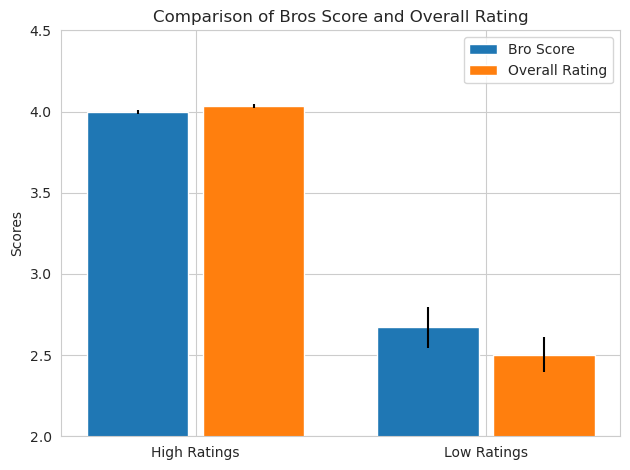

In [31]:
# compute mean and std error by df
high_means = [
    high_ratings_with_bros_score['bros_score_1_5'].mean(),
    high_ratings_with_bros_score['other_rating'].mean()
]
high_stderr = [
    high_ratings_with_bros_score['bros_score_1_5'].std() / np.sqrt(len(high_ratings_with_bros_score)),
    high_ratings_with_bros_score['other_rating'].std() / np.sqrt(len(high_ratings_with_bros_score))
]

low_means = [
    low_ratings_with_bros_score['bros_score_1_5'].mean(),
    low_ratings_with_bros_score['other_rating'].mean()
]
low_stderr = [
    low_ratings_with_bros_score['bros_score_1_5'].std() / np.sqrt(len(low_ratings_with_bros_score)),
    low_ratings_with_bros_score['other_rating'].std() / np.sqrt(len(low_ratings_with_bros_score))
]

labels = ['High Ratings', 'Low Ratings']
x = np.arange(len(labels))
width = 0.35
gap = 0.05

fig, ax = plt.subplots()

# plot bars for both group
ax.bar(x - (width+gap)/2, [high_means[0], low_means[0]], width,
       yerr=[high_stderr[0], low_stderr[0]], label='Bro Score')

ax.bar(x + (width+gap)/2, [high_means[1], low_means[1]], width,
       yerr=[high_stderr[1], low_stderr[1]], label='Overall Rating')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Bros Score and Overall Rating')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(2, 4.5)

plt.tight_layout()
plt.show()

## Country biases investigation

In this part we'll try to find whether people that come from the same place as the beer (domestic raters), rate the beer higher than people who don't (international raters). We'll use the BeerAdvocate and RateBeer datasets and compare the results for both datasets. 

Let's first investigate the BeerAdvocate datset !

In [32]:
from scipy.stats import ttest_ind, pearsonr, spearmanr

import src.data.country_bias as cb

We start by loading the ratings, users, breweries and beers data. We keep only relevant columns and drop every that has a nan value. 

In [33]:
df_ratings_ba, df_users_ba, df_breweries_ba, df_beers_ba = cb.load_country_data()

Keep 4,654,808 ratings out of 8,393,032 (55.46%)
Keep 122,425 users out of 153,704 (79.65%)
Keep 16,758 breweries out of 16,758 (100.00%)
Keep 5,702 beers out of 280,823 (2.03%)


Except for the beers data, we still keep a major part of the data. Now let's merge the 4 dataframes together.

In [34]:
df_merged_ba = cb.merge_country_data(df_ratings_ba, df_users_ba, df_breweries_ba, df_beers_ba)

There are 156,602 domestic ratings vs 1,388,164 international ratings


In the end we have a dataset of more than 1.5 million data which is still quite large ! However, domestic ratings are quite imbalanced as we have almost 10 times more international ratings. Now let's fit a linear model to the data to see which feature influences the user ratings.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.616e+05
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:17:41   Log-Likelihood:            -1.1092e+06
No. Observations:             1544766   AIC:                         2.218e+06
Df Residuals:                 1544760   BIC:                         2.219e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

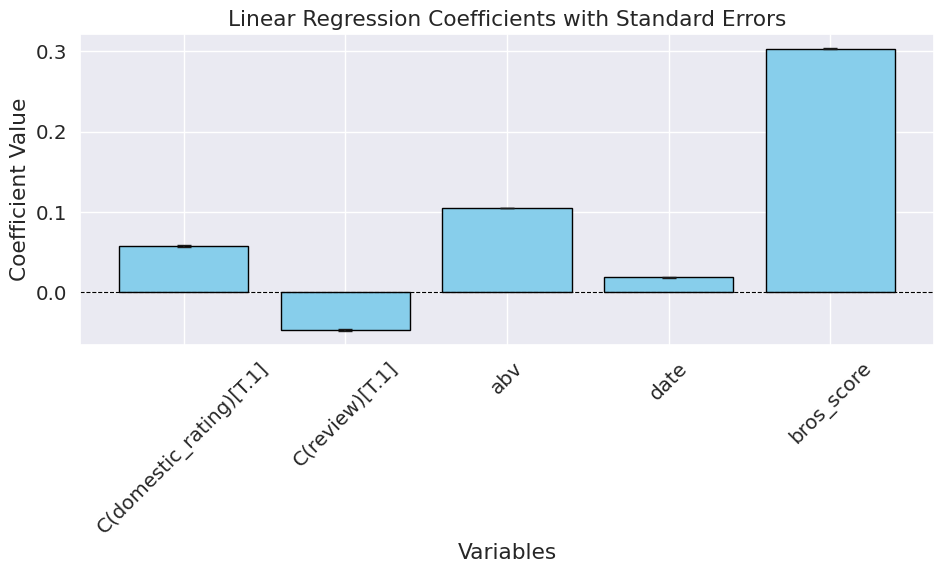

In [35]:
cb.regression_analysis(df_merged_ba)

We first notice that all coefficients are significant at level 0.05. The largest coefficient is associated with the bros_score which can mean that users are influenced by the "brothers" (BeerAdvocate site founders) ratings. Then, the ABV seems to have a large influence too. Domestic ratings also have a positive influence in the regression, so there might indeed be a location bias.

We can plot a histogram of the ratings for both domestic (treated group) and international ratings (control group) and see other basic statistics of the ratings.

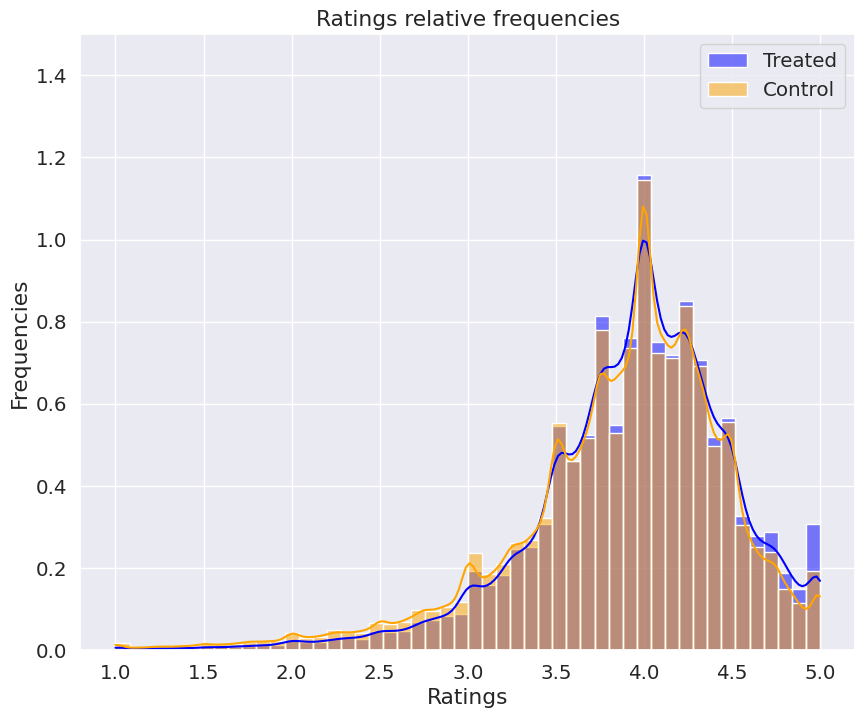

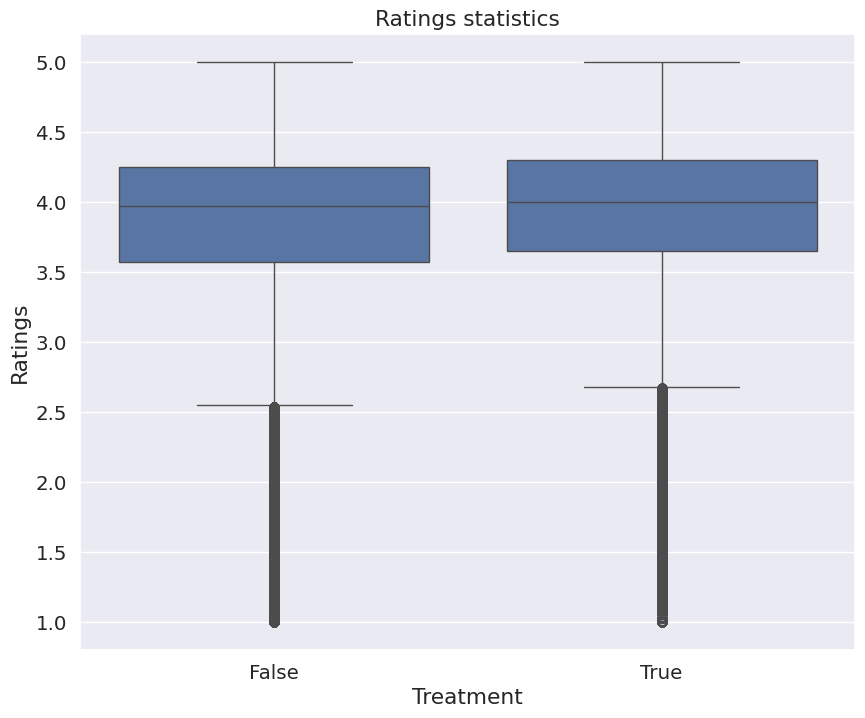

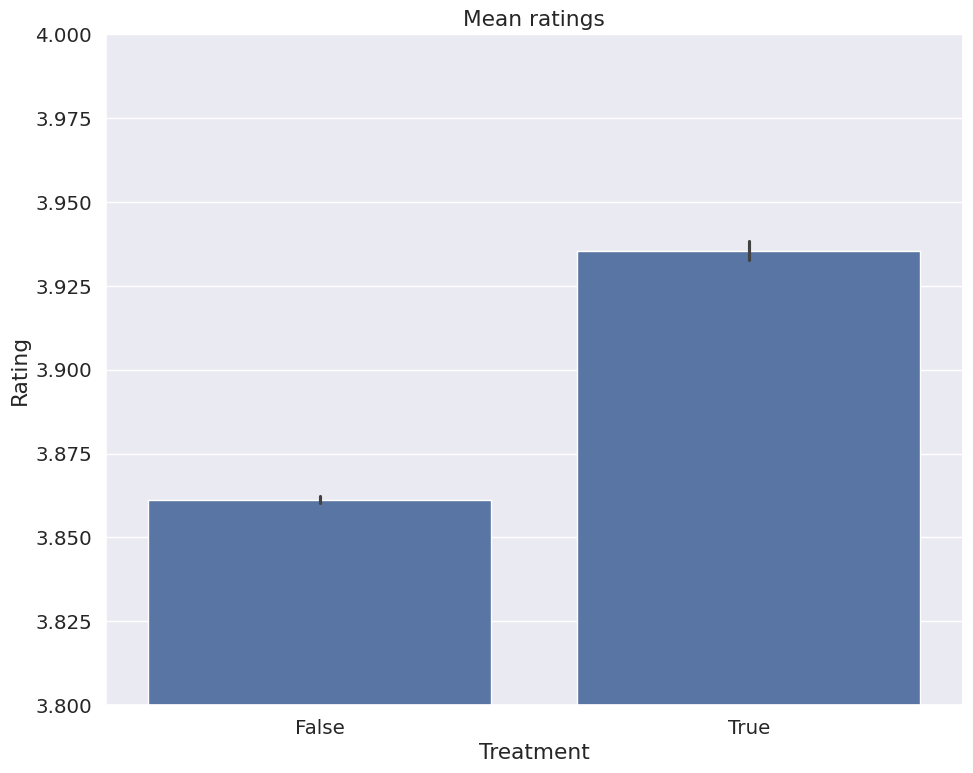

In [36]:
cb.compare_control_and_treatment(df_merged_ba)

We see a small shift to the right of the treated group in the histogram, meaning that the ratings seem to be higher for this group. We also see a higher mean and median for the treated group. However, the data might be imbalanced and as we saw before, we have way more data in the control group so the results might be biased by undetected confounders.

To try to mitigate the effect of these undetected confounders, we can do a propensity score matching (psm) on the control and treatment groups. As this can be computationally intensive, we have to heavily subsample the dataset.

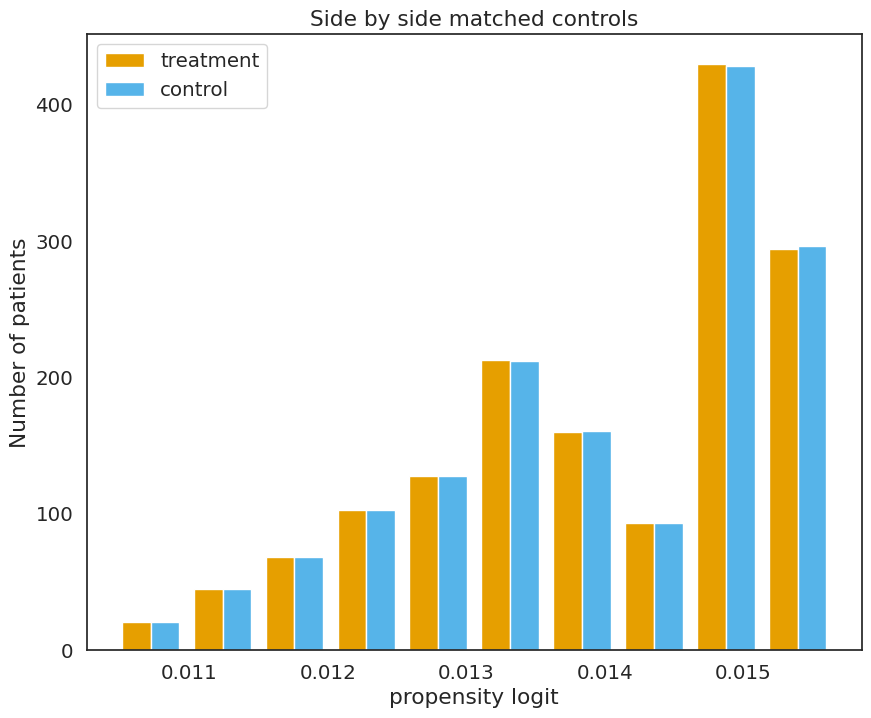

In [37]:
df_balanced_ba = cb.psm_balancing(df_merged_ba, frac_kept=1.0/100.0)

The matching seems to have balanced the data well as we can see on the plot above.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     229.0
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          1.36e-208
Time:                        22:19:34   Log-Likelihood:                -2269.2
No. Observations:                3110   AIC:                             4550.
Df Residuals:                    3104   BIC:                             4587.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

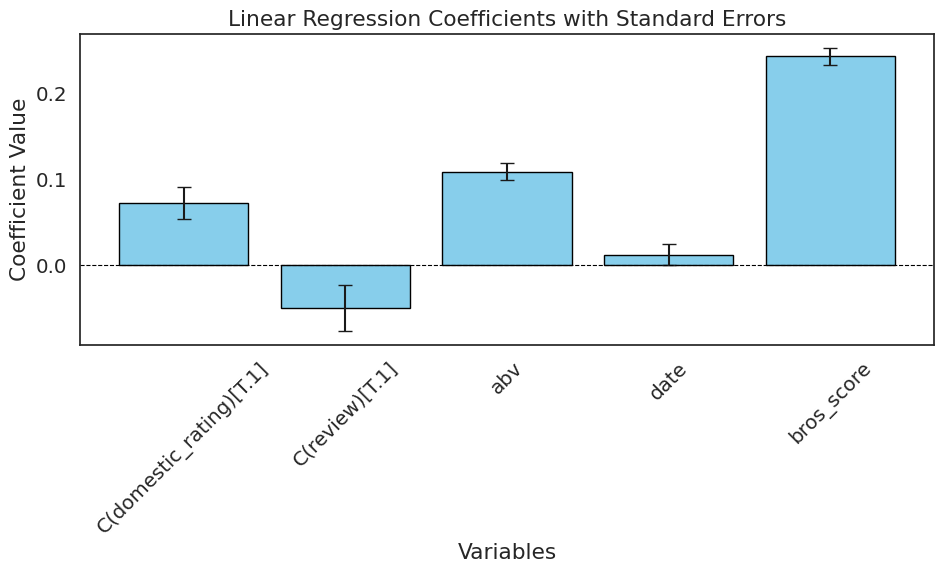

In [38]:
cb.regression_analysis(df_balanced_ba)

The results didn't change much after the matching. We have larger error bars which can be expected as we have less data. The review and date coefficients are not statistically significant now.

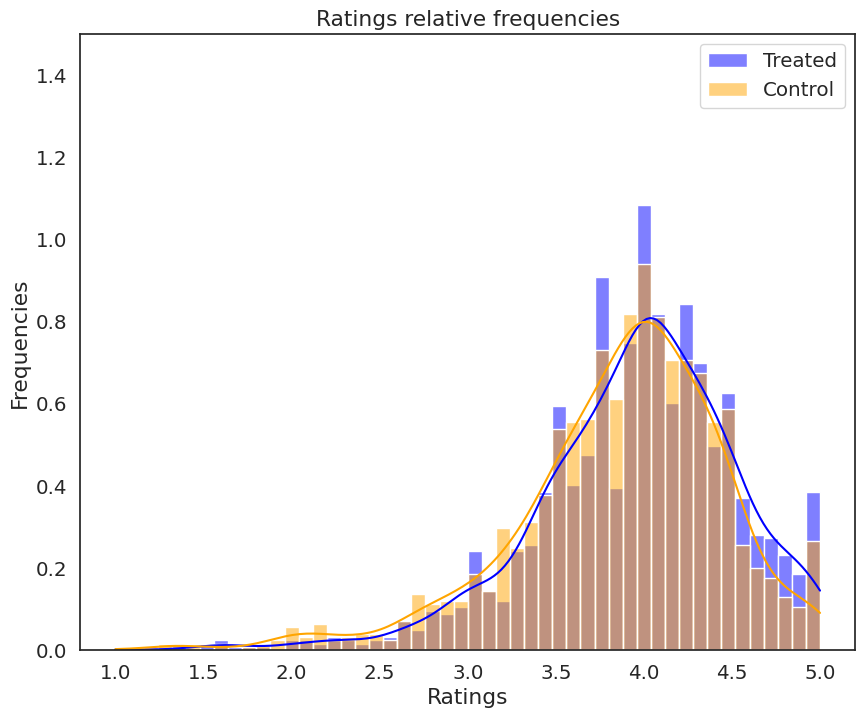

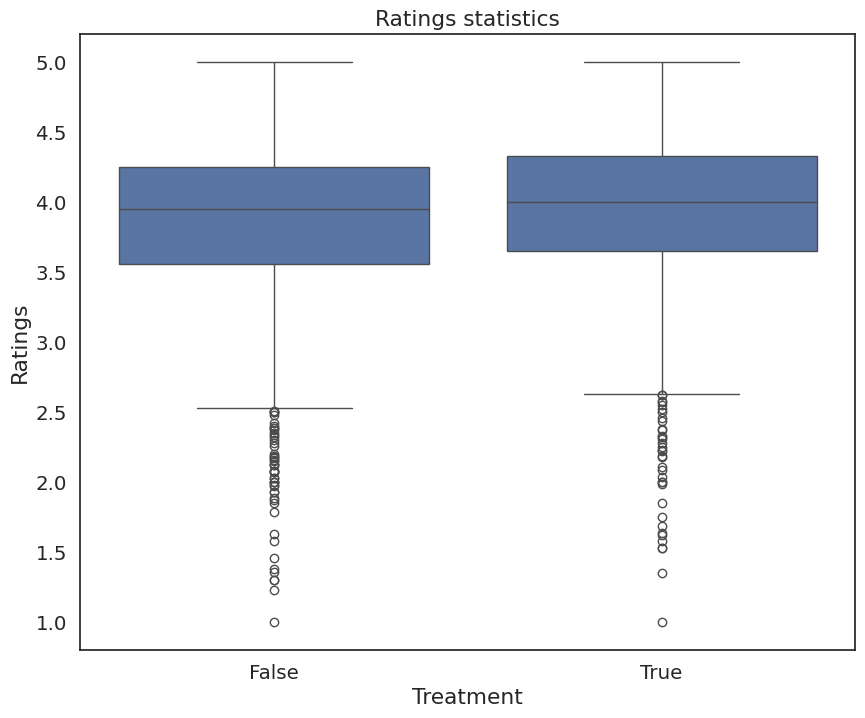

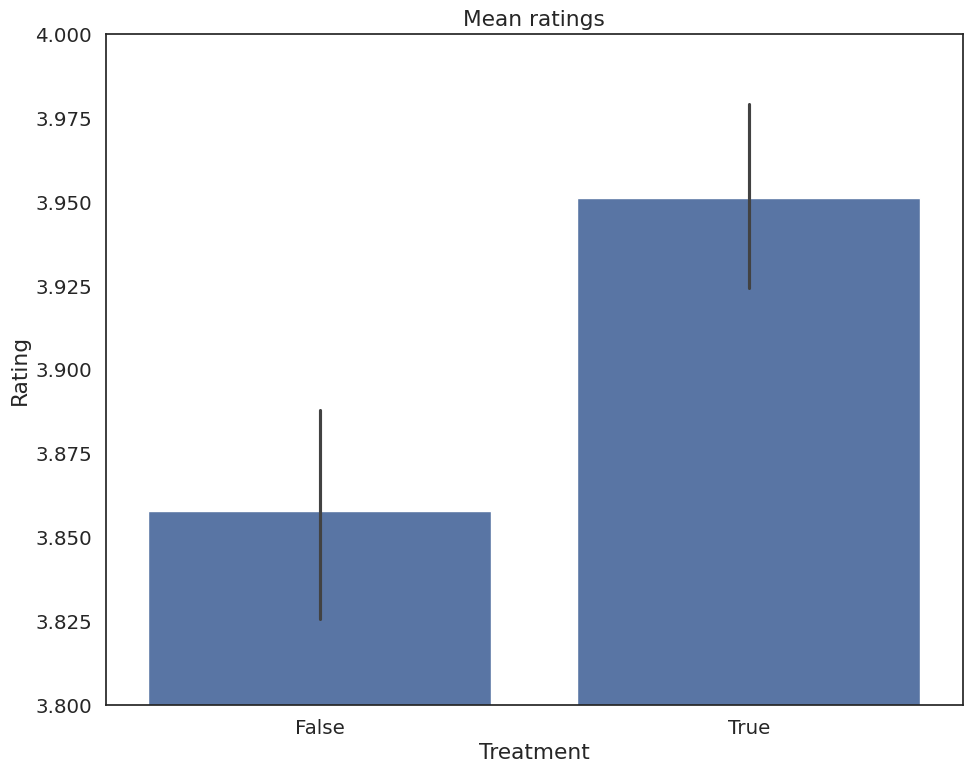

In [39]:
cb.compare_control_and_treatment(df_balanced_ba)

As before the matching, results show slightly higher ratings for domestic ratings.

Let's do a t-test to see if there is a significant difference between the control and treatment groups mean ratings.

In [40]:
# The distributions are more or less normal, and we suppose they are independent so we can use the two samples t-test
# H0: There is no significant difference between domestic and international ratings
# H1: There is a significant difference between domestic and international ratings
df_treatment_ba = df_balanced_ba[df_balanced_ba['domestic_rating'] == True]
df_control_ba = df_balanced_ba[df_balanced_ba['domestic_rating'] == False]

p_value = ttest_ind(df_treatment_ba['rating'], df_control_ba['rating']).pvalue
print(f'P-value: {p_value}')

# If the p-value is smaller than significance level 5% we reject H0
if p_value < 0.05:
    print("There is a significant difference between domestic and international ratings")
else:
    print("There is no significant difference between domestic and international ratings")

P-value: 8.95916714343462e-06
There is a significant difference between domestic and international ratings


We see that there is indeed a significant difference between the control and treated group ratings.

Now let's repeat the experiments on RateBeer's dataset.

As before, we load the data and keep relevant columns.

In [41]:
df_ratings_rb, df_users_rb, df_breweries_rb, df_beers_rb = cb.load_country_data(beer_advocate=False)

Keep 6,947,090 ratings out of 7,122,074 (97.54%)
Keep 50,592 users out of 70,174 (72.10%)
Keep 24,189 breweries out of 24,189 (100.00%)
Keep 442,081 beers out of 442,081 (100.00%)


In [42]:
df_merged_rb = cb.merge_country_data(df_ratings_rb, df_users_rb, df_breweries_rb, df_beers_rb)

There are 1,880,681 domestic ratings vs 4,867,310 international ratings


We have kept most of the ratings as there was few nan values.

Let's do again some regression analysis.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                 4.588e+05
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:20:15   Log-Likelihood:            -6.3437e+06
No. Observations:             6747991   AIC:                         1.269e+07
Df Residuals:                 6747987   BIC:                         1.269e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

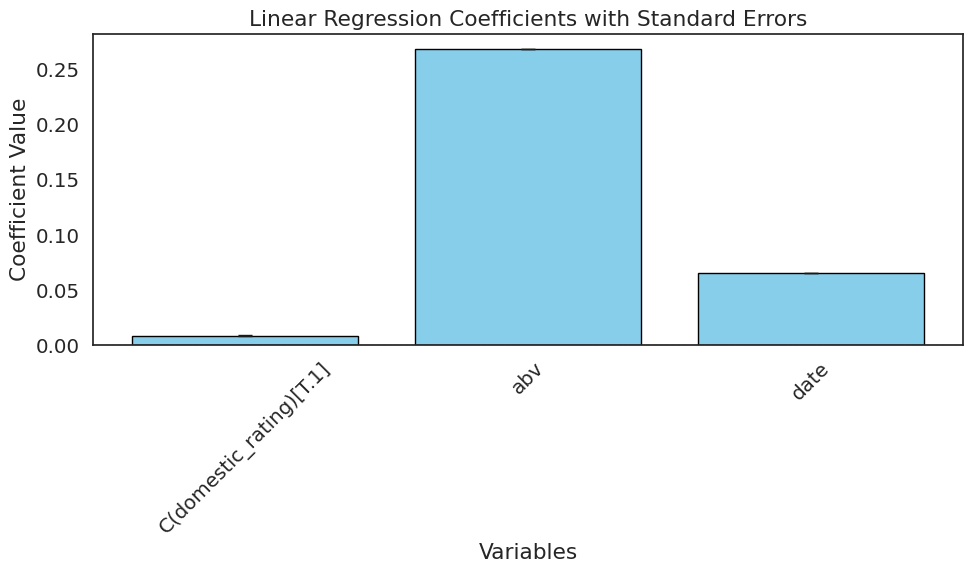

In [43]:
cb.regression_analysis(df_merged_rb, beer_advocate=False)

All coefficients are significant but this time we see that domestic ratings have way less influence than the other variables.

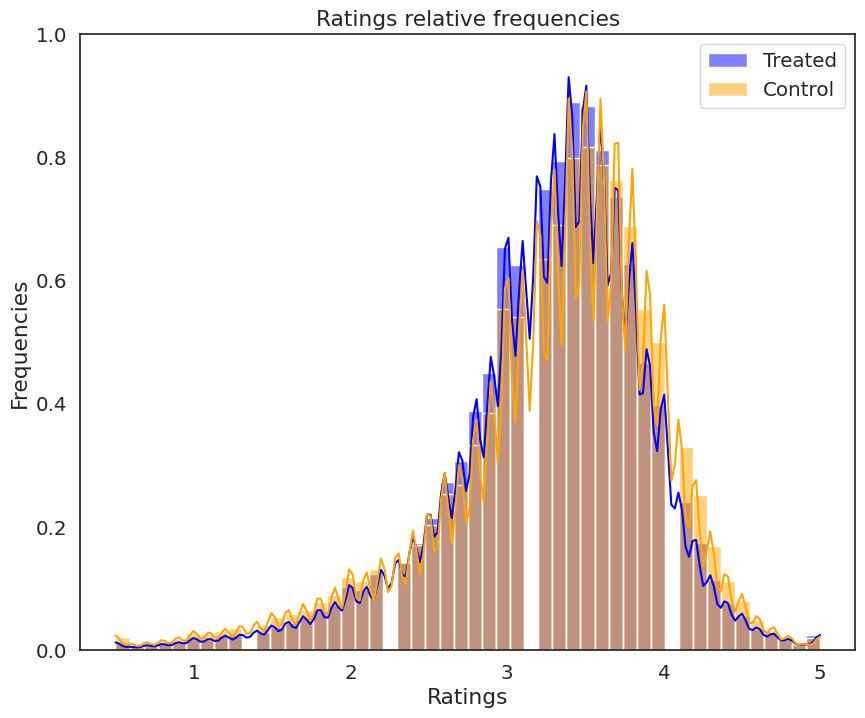

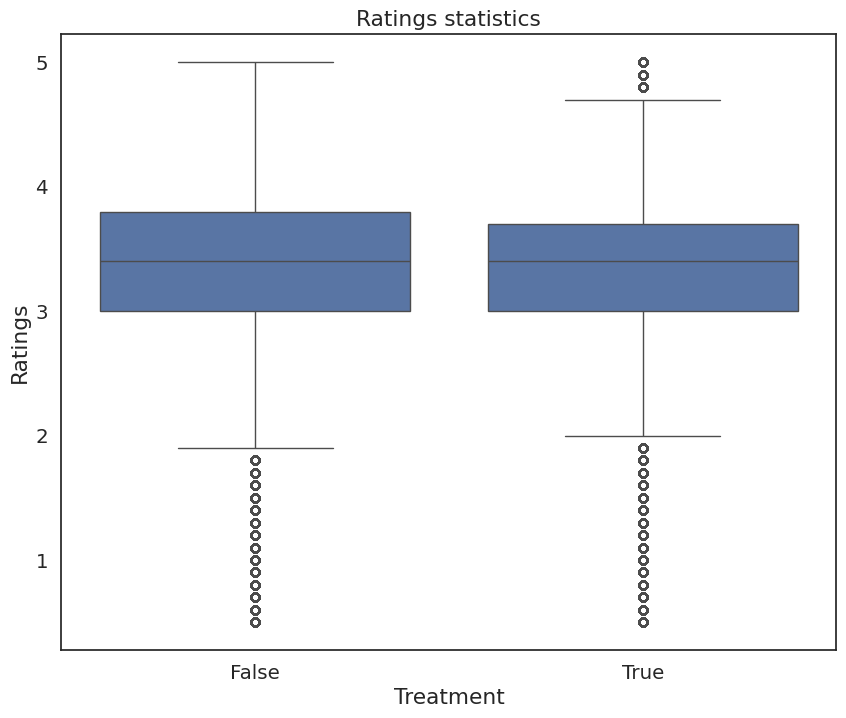

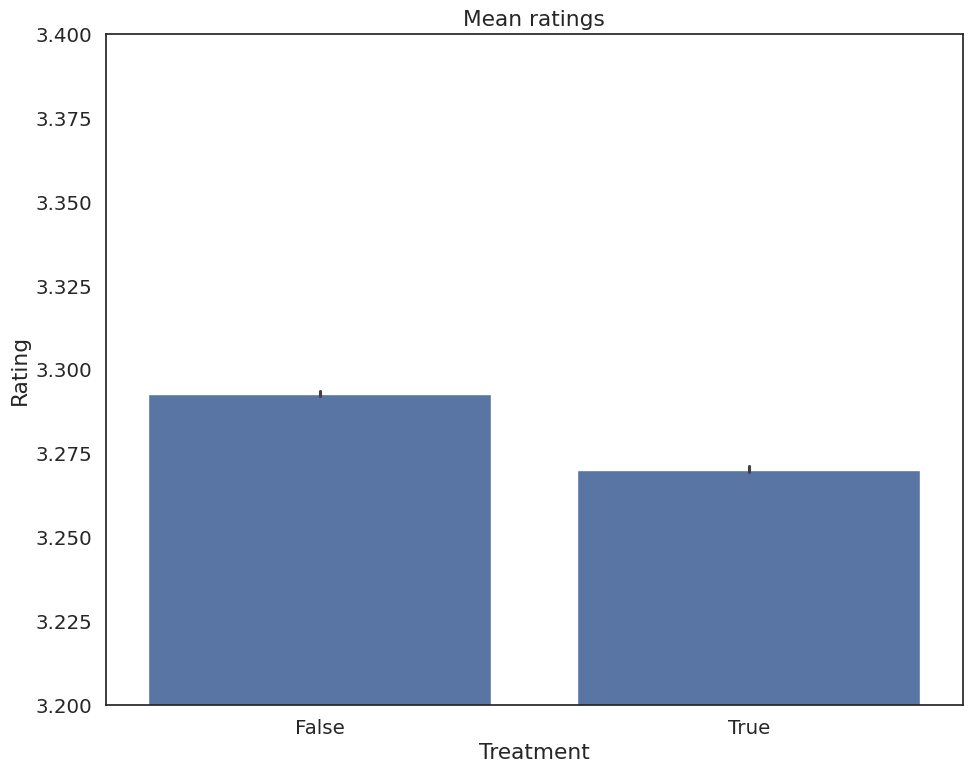

In [44]:
cb.compare_control_and_treatment(df_merged_rb, beer_advocate=False)

We see on the plots that this time, the control group seems to have higher ratings (even though the difference is very small). But we'll still need to see after matching.

/home/yann/anaconda3/envs/ada-2024-project-insightmakers24/lib/python3.8/site-packages/psmpy/psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


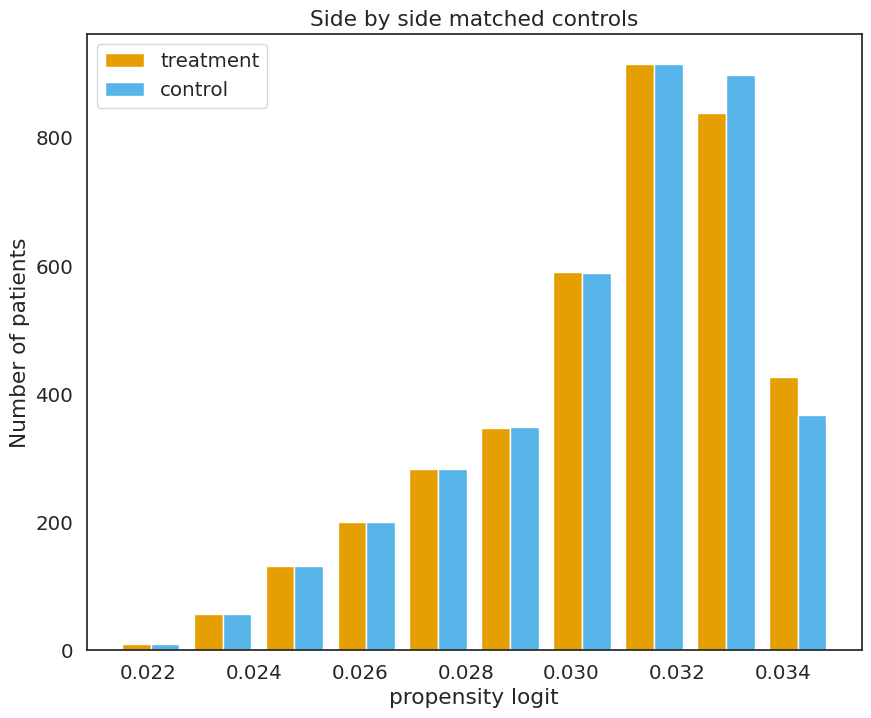

In [45]:
df_balanced_rb = cb.psm_balancing(df_merged_rb, frac_kept=1.0/500.0)

The matching seems good again

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     492.9
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          1.22e-292
Time:                        22:29:18   Log-Likelihood:                -6970.8
No. Observations:                7599   AIC:                         1.395e+04
Df Residuals:                    7595   BIC:                         1.398e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

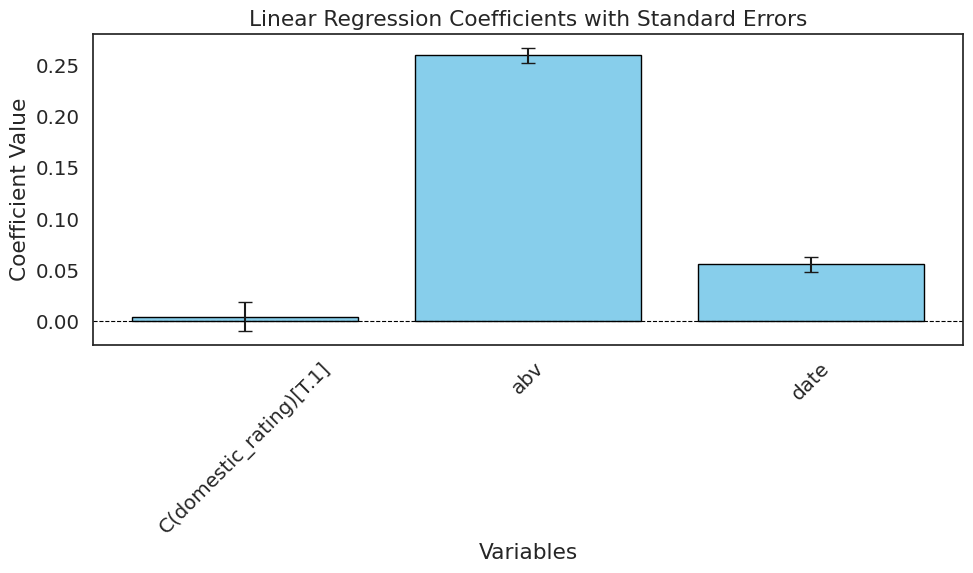

In [46]:
cb.regression_analysis(df_balanced_rb, beer_advocate=False)

This time the domestic rating has a small negative effect. 

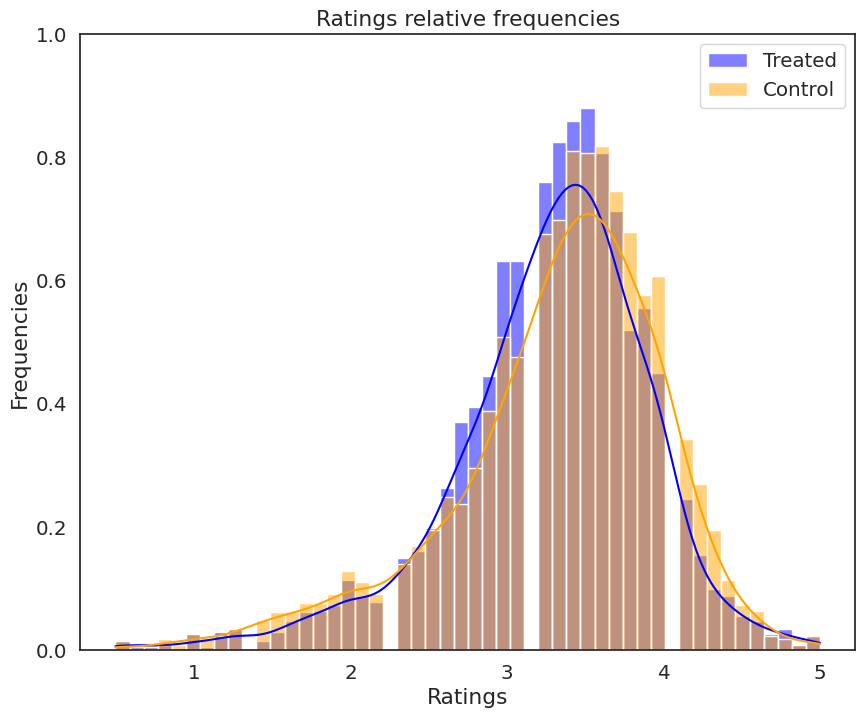

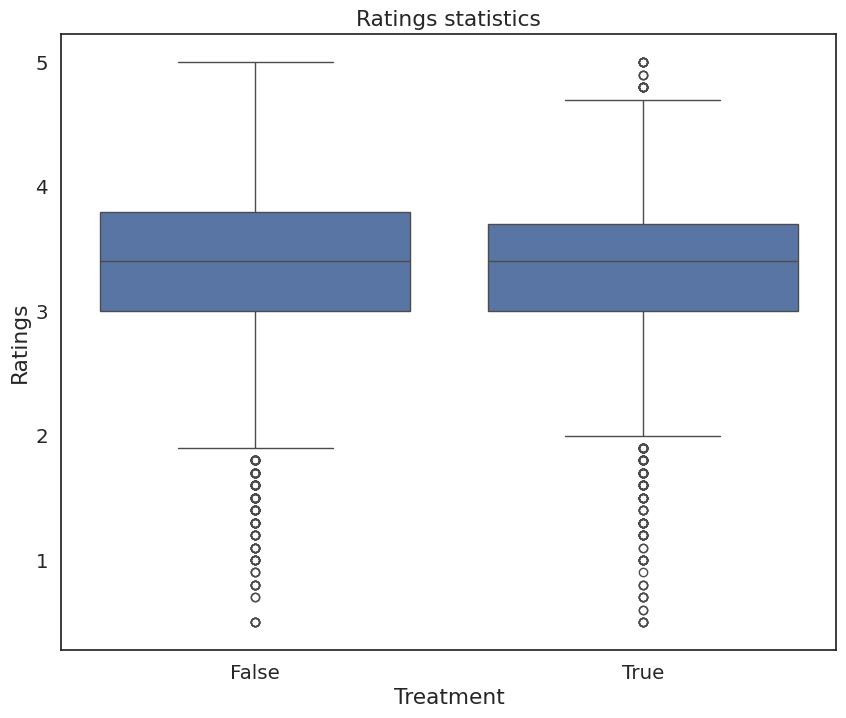

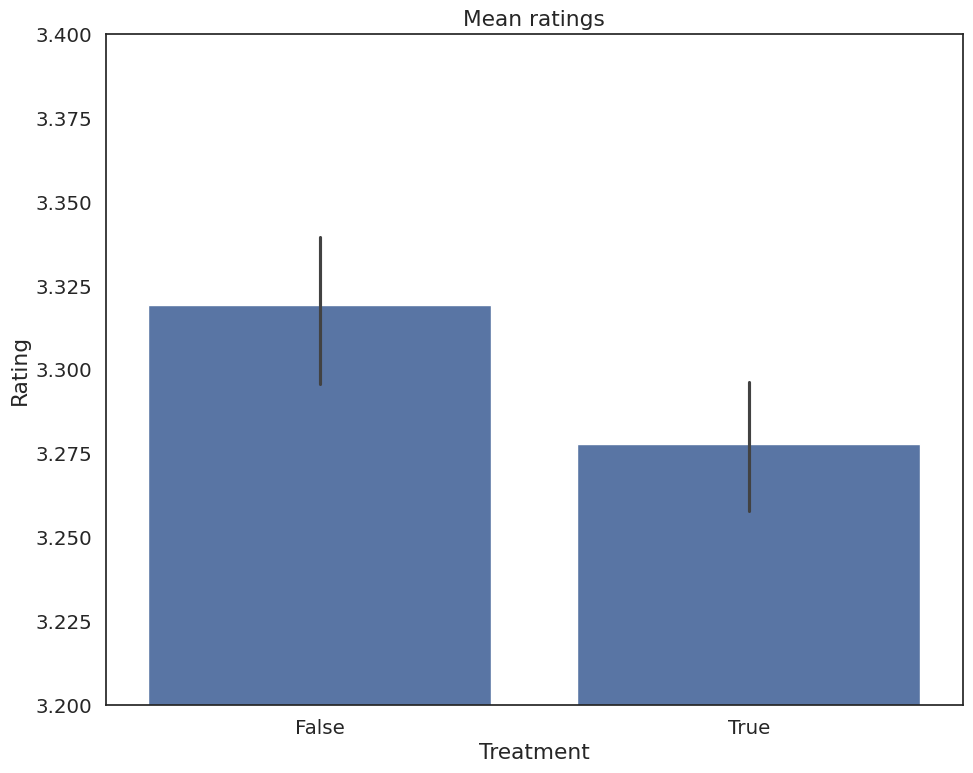

In [47]:
cb.compare_control_and_treatment(df_balanced_rb, beer_advocate=False)

The results didn't change much after matching except for the domestic rating coefficient which is now negative.

In [48]:
# The distributions are more or less normal, and we suppose they are independent so we can use the two samples t-test
# H0: There is no significant difference between domestic and international ratings
# H1: There is a significant difference between domestic and international ratings
df_treatment_rb = df_balanced_rb[df_balanced_rb['domestic_rating'] == True]
df_control_rb = df_balanced_rb[df_balanced_rb['domestic_rating'] == False]

p_value = ttest_ind(df_treatment_rb['rating'], df_control_rb['rating']).pvalue
print(f'P-value: {p_value}')

# If the p-value is smaller than significance level 5% we reject H0
if p_value < 0.05:
    print("There is a significant difference between domestic and international ratings")
else:
    print("There is no significant difference between domestic and international ratings")

P-value: 0.0064012743856730675
There is a significant difference between domestic and international ratings


The results on this dataset would suggest domestic ratings are lower than international ratings which is the inverse that we find on the BeerAdvocate which is quite surprising. We conclude that there is probably no effect of coming from the same country as the beer on the ratings.

Finally, let's quickly investigate if there is a correlation between beer consumption and the mean rating in a country.

We first load and merge the additional dataset to the BeerAdvocate and RateBeer datasets.

In [49]:
df_beer_consm_ba = cb.load_beer_consumption_data('data', beer_advocate=True)
df_beer_consm_rb = cb.load_beer_consumption_data('data', beer_advocate=False)

Keep 1,169,810 breweries out of 1,169,810 (100.00%)
Keep 1,631,393 breweries out of 1,631,393 (100.00%)


We compute the Pearson and Spearman correlation coefficients for both BeerAdvocate and RateBeer. 

In [50]:
print(pearsonr(df_beer_consm_ba['rating'], df_beer_consm_ba['beer_consumption_per_capita']))
print(spearmanr(df_beer_consm_ba['rating'], df_beer_consm_ba['beer_consumption_per_capita']))

PearsonRResult(statistic=0.18616657196861797, pvalue=0.023484876198849224)
SignificanceResult(statistic=0.190784675923698, pvalue=0.020195653589314376)


In [51]:
print(pearsonr(df_beer_consm_rb['rating'], df_beer_consm_rb['beer_consumption_per_capita']))
print(spearmanr(df_beer_consm_rb['rating'], df_beer_consm_rb['beer_consumption_per_capita']))

PearsonRResult(statistic=0.0870288211329491, pvalue=0.2979349898993427)
SignificanceResult(statistic=-0.004597701149425287, pvalue=0.9562302698554669)


We see a small significant correlation for BeerAdvocate but not for RateBeer so there might also not be a significant link between beer consumption and the ratings.

## Influence of Beer Names on Ratings

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import seaborn as sns
from scipy.stats import ttest_ind
from wordcloud import WordCloud

from src.data.name_bias import convert_name_to_stemmed_keywords, preprocess_type_in_name_analysis, per_style_presence_in_name

## Load and Preprocess the Data

In [54]:
DATA_PATH_ROOT = "data"
ba_beers = pd.read_csv(os.path.join(DATA_PATH_ROOT, "BeerAdvocate/beers.csv"))
rb_beers = pd.read_csv(os.path.join(DATA_PATH_ROOT, "RateBeer/beers.csv"))

# NOTE: This can take several minutes to run
ba_beers = preprocess_type_in_name_analysis(ba_beers)
rb_beers = preprocess_type_in_name_analysis(rb_beers)

## Beer Name Wordclouds

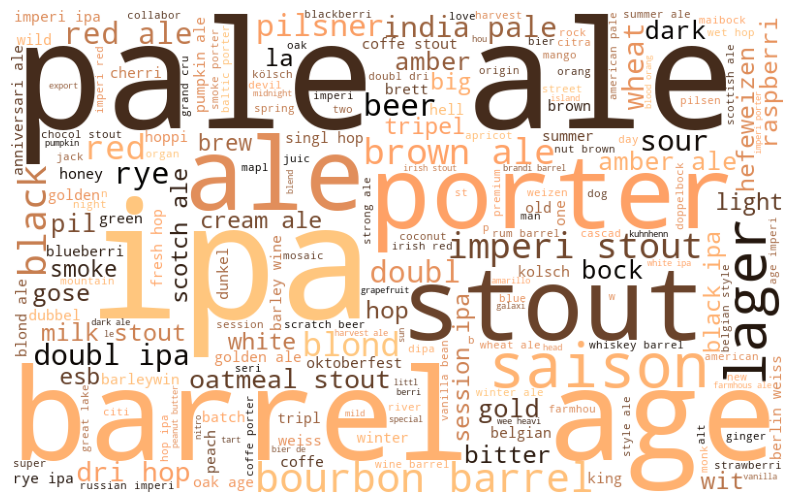

In [55]:
all_names = " ".join(list(ba_beers.explode("name_keywords")["name_keywords"].dropna()))
wc = WordCloud(background_color='white', colormap = 'copper', width = 800, height = 500).generate(all_names)
plt.axis("off")
plt.imshow(wc)

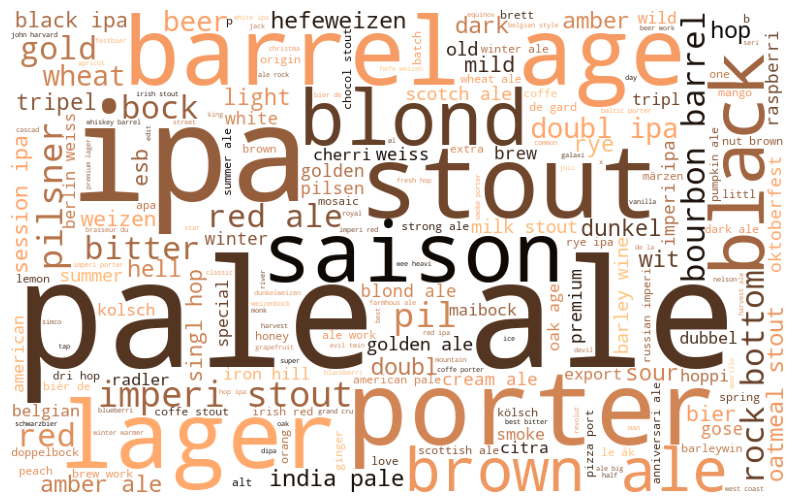

In [56]:
all_names = " ".join(list(rb_beers.explode("name_keywords")["name_keywords"].dropna()))
wc = WordCloud(background_color='white', colormap = 'copper', width = 800, height = 500).generate(all_names)
plt.axis("off")
plt.imshow(wc)

## Keyword Rating Analysis

### BeerAdvocate

In [57]:
exploded_keywords = ba_beers.explode("no_brewery_name")
keyword_ratings = exploded_keywords.groupby("no_brewery_name")["avg"].agg(["mean", "count", "std", "min", "max"]).reset_index()

# Keep only keywords which are common and significant (>= 100 beers with keyword)
significant_keywords = keyword_ratings[keyword_ratings["count"] >= 100]

In [58]:
ba_top_avg = significant_keywords.nlargest(10, "mean")
ba_bot_avg = significant_keywords.nsmallest(10, "mean")
ba_top_std = significant_keywords.nlargest(10, "std")
ba_bot_std = significant_keywords.nsmallest(10, "std")

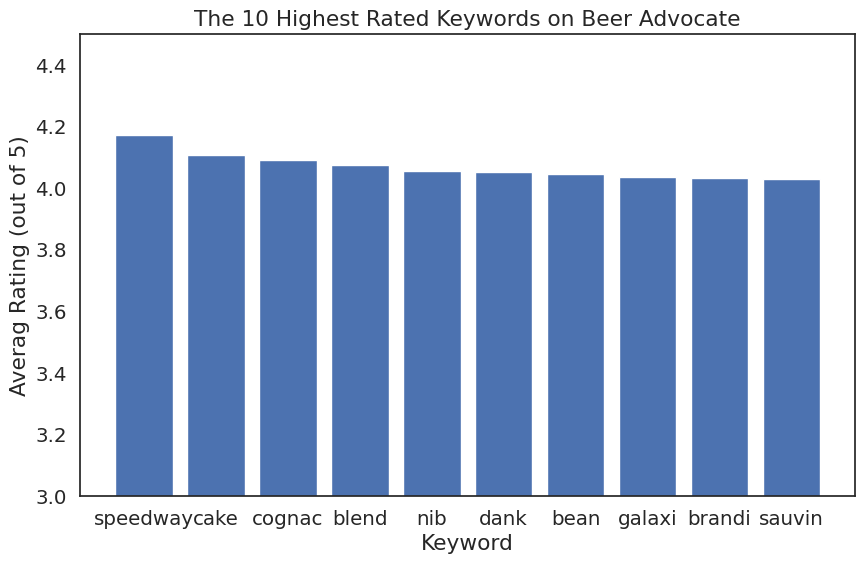

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(ba_top_avg["no_brewery_name"], ba_top_avg["mean"])
plt.title("The 10 Highest Rated Keywords on Beer Advocate")
plt.xlabel("Keyword")
plt.ylabel("Averag Rating (out of 5)")
plt.ylim(3, 4.5)
plt.show()

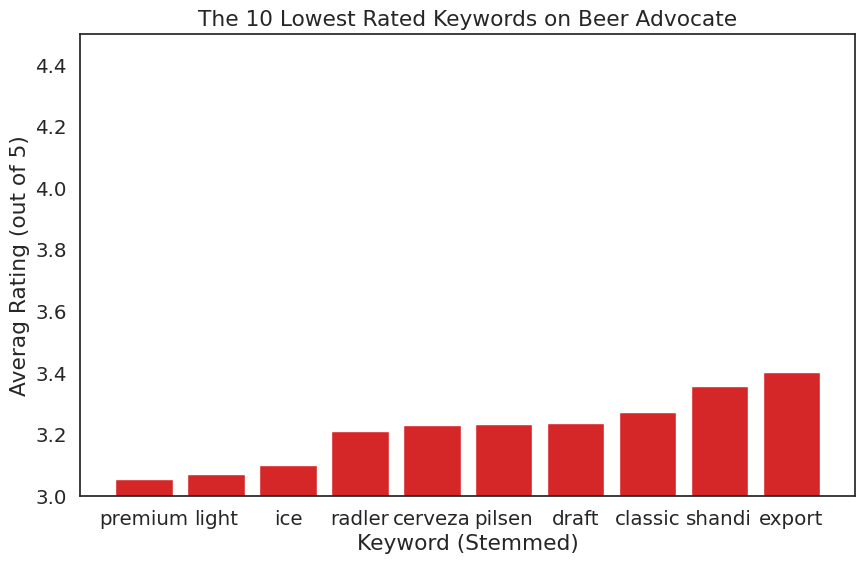

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(ba_bot_avg["no_brewery_name"], ba_bot_avg["mean"], color="tab:red")
plt.title("The 10 Lowest Rated Keywords on Beer Advocate")
plt.xlabel("Keyword (Stemmed)")
plt.ylabel("Averag Rating (out of 5)")
plt.ylim(3, 4.5)
plt.show()

### Rate Beer

In [61]:
exploded_keywords = rb_beers.explode("no_brewery_name")
keyword_ratings = exploded_keywords.groupby("no_brewery_name")["avg"].agg(["mean", "count", "std", "min", "max"]).reset_index()

# Keep only keywords which are common and significant (>= 100 beers with keyword)
significant_keywords = keyword_ratings[keyword_ratings["count"] >= 100]

In [62]:
rb_top_avg = significant_keywords.nlargest(10, "mean")
rb_bot_avg = significant_keywords.nsmallest(10, "mean")
rb_top_std = significant_keywords.nlargest(10, "std")
rb_bot_std = significant_keywords.nsmallest(10, "std")

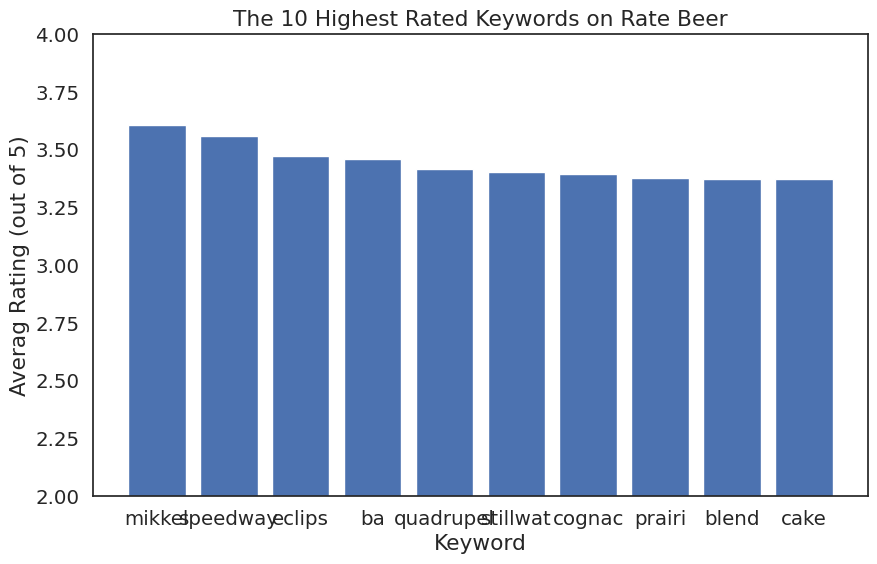

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(rb_top_avg["no_brewery_name"], rb_top_avg["mean"])
plt.title("The 10 Highest Rated Keywords on Rate Beer")
plt.xlabel("Keyword")
plt.ylabel("Averag Rating (out of 5)")
plt.ylim(2, 4)
plt.show()

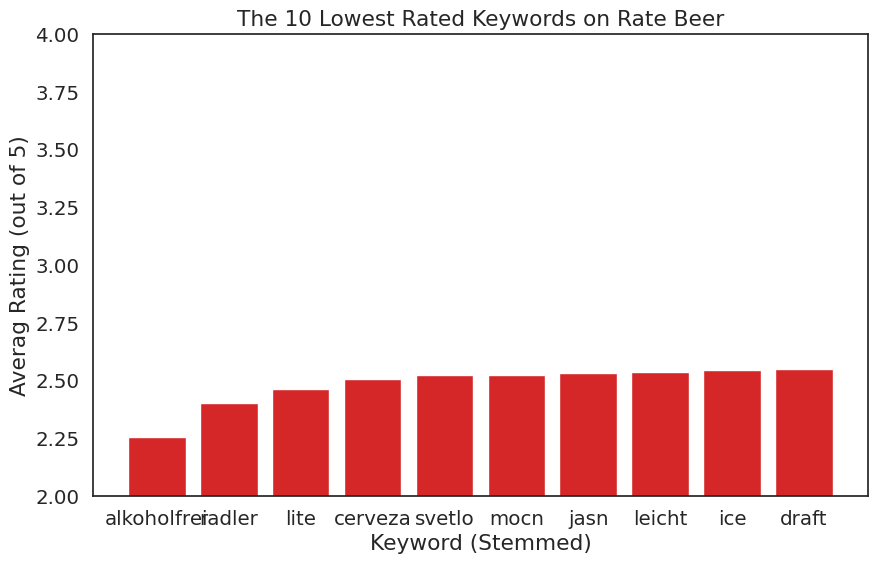

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(rb_bot_avg["no_brewery_name"], rb_bot_avg["mean"], color="tab:red")
plt.title("The 10 Lowest Rated Keywords on Rate Beer")
plt.xlabel("Keyword (Stemmed)")
plt.ylabel("Averag Rating (out of 5)")
plt.ylim(2, 4)
plt.show()

## Proportion of Beer Names with Style or Brewery in the Name

In [65]:
num_rb_style = rb_beers["has_style_in_name"].sum()
num_ba_style = ba_beers["has_style_in_name"].sum()

print(f"Proportion of beer names mentioning the style of the beer:\nBeerAdvocate: {num_ba_style/ba_beers.shape[0]}\nRateBeer: {num_rb_style/rb_beers.shape[0]}")

Proportion of beer names mentioning the style of the beer:
BeerAdvocate: 0.4186673356631525
RateBeer: 0.38129325410695564


In [66]:
num_rb_brewery = rb_beers["has_brewery_in_name"].sum()
num_ba_brewery = ba_beers["has_brewery_in_name"].sum()

print(f"Proportion of beer names mentioning the brewery of the beer:\nBeerAdvocate: {num_ba_brewery/ba_beers.shape[0]}\nRateBeer: {num_rb_brewery/rb_beers.shape[0]}")

Proportion of beer names mentioning the brewery of the beer:
BeerAdvocate: 0.1429804960297781
RateBeer: 0.8934603285564487


In [67]:
num_rb_style = (rb_beers["has_style_in_name"] | rb_beers["has_brewery_in_name"]).sum()
num_ba_style = (ba_beers["has_style_in_name"] | ba_beers["has_brewery_in_name"]).sum()

print(f"Proportion of beer names mentioning either the style or brewery of the beer:\nBeerAdvocate: {num_ba_style/ba_beers.shape[0]}\nRateBeer: {num_rb_style/rb_beers.shape[0]}")

Proportion of beer names mentioning either the style or brewery of the beer:
BeerAdvocate: 0.492033302022742
RateBeer: 0.9263369451240825


## Proportions of Style and Breweries in Names per Beer Style

In [68]:
ba_style_proportion = per_style_presence_in_name(ba_beers)
rb_style_proportion = per_style_presence_in_name(rb_beers)

In [69]:
ba_style_proportion.sort_values("proportion_with_style_in_name", ascending=False)

,style,total_beers,beers_with_style_in_name,proportion_with_style_in_name,beers_with_brewery_in_name,proportion_with_brewery_in_name
67,Irish Dry Stout,957,741,0.774295,141,0.147335
68,Irish Red Ale,911,691,0.758507,139,0.152580
56,Faro,24,18,0.750000,14,0.583333
44,English Brown Ale,1240,894,0.720968,251,0.202419
78,Maibock / Helles Bock,845,589,0.697041,188,0.222485
...,...,...,...,...,...,...
20,American Wild Ale,6421,560,0.087214,474,0.073820
103,Witbier,2571,155,0.060288,415,0.161416
60,Fruit / Vegetable Beer,3485,146,0.041894,594,0.170445
71,Kristalweizen,148,6,0.040541,46,0.310811


In [70]:
rb_style_proportion[rb_style_proportion["total_beers"] >= 10].sort_values("proportion_with_style_in_name", ascending=False)

,style,total_beers,beers_with_style_in_name,proportion_with_style_in_name,beers_with_brewery_in_name,proportion_with_brewery_in_name
45,Lambic Style - Faro,23,19,0.826087,19,0.826087
23,Dry Stout,1554,1153,0.741956,1460,0.939511
59,Porter,8586,5845,0.680759,8111,0.944677
19,Cream Ale,1174,792,0.674617,1120,0.954003
16,Brown Ale,6202,4114,0.663334,5765,0.929539
...,...,...,...,...,...,...
90,Witbier,4019,270,0.067181,3564,0.886788
31,Fruit Beer,6563,369,0.056224,5782,0.881000
49,Low Alcohol,1856,71,0.038254,1179,0.635237
84,Spice/Herb/Vegetable,8529,265,0.031070,7614,0.892719


## Look for Discrepancies Between Beers of the Same Style Depending on Whether the Style is in the Beer's Name

In [71]:
ba_without = ba_beers[~ba_beers["has_style_in_name"]]["avg"]
ba_with = ba_beers[ba_beers["has_style_in_name"]]["avg"]

print(f"With Style: {ba_with.mean()}\nWithout Style: {ba_without.mean()}\nDifference: {ba_with.mean() - ba_without.mean()}")

With Style: 3.7121290412486063
Without Style: 3.770175730873837
Difference: -0.05804668962523074


In [72]:
rb_without = rb_beers[~rb_beers["has_style_in_name"]]["avg"]
rb_with = rb_beers[rb_beers["has_style_in_name"]]["avg"]

print(f"With Style: {rb_with.mean()}\nWithout Style: {rb_without.mean()}\nDifference: {rb_with.mean() - rb_without.mean()}")

With Style: 3.0848187302868038
Without Style: 3.0530801656768625
Difference: 0.03173856460994129


In [73]:
t_stat, p_value = ttest_ind(ba_without, ba_with)
t_stat, p_value

(27.084065695412736, 3.3252662320058575e-161)

In [74]:
t_stat, p_value = ttest_ind(rb_without.dropna(), rb_with.dropna())
t_stat, p_value

(-24.962694898541802, 2.184299187834839e-137)

## Same for Brewery Name

In [75]:
ba_without = ba_beers[~ba_beers["has_brewery_in_name"]]["avg"]
ba_with = ba_beers[ba_beers["has_brewery_in_name"]]["avg"]

print(f"With Brewery: {ba_with.mean()}\nWithout Brewery: {ba_without.mean()}\nDifference: {ba_with.mean() - ba_without.mean()}")

With Brewery: 3.619405475986453
Without Brewery: 3.766972715018994
Difference: -0.14756723903254088


In [76]:
rb_without = rb_beers[~rb_beers["has_brewery_in_name"]]["avg"]
rb_with = rb_beers[rb_beers["has_brewery_in_name"]]["avg"]

print(f"With Brewery: {rb_with.mean()}\nWithout Brewery: {rb_without.mean()}\nDifference: {rb_with.mean() - rb_without.mean()}")

With Brewery: 3.0928959539834087
Without Brewery: 2.8327753896636594
Difference: 0.2601205643197493


In [77]:
t_stat, p_value = ttest_ind(ba_without, ba_with)
t_stat, p_value

(49.092818653246866, 0.0)

In [78]:
t_stat, p_value = ttest_ind(rb_without.dropna(), rb_with.dropna())
t_stat, p_value

(-133.81942925477944, 0.0)